## LinearRegression

- LinearRegression is one of the fundamental algorithm
- it is used to find the relationship between independent features and dependent features
- it shows the extent of the impact of multiple features and dependent features
- LinearRegression,fit the line/curve to the datapoints in such a manner that the difference between datapoints to curve line is minimal.
-                                           Y=a+b*X + e 

  Where,
- a is the intercept, 
- b is the slope of the line,  and e is the error term. 
- The equation above is used to predict the value of the target variable based on the given predictor variable(s).



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
data=pd.read_csv('Advertising.csv')

In [4]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

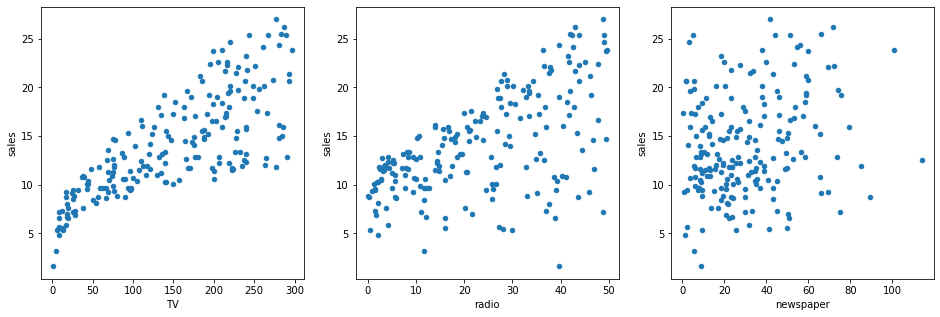

In [8]:
fig,x=plt.subplots(1,3)
data.plot('TV','sales',kind='scatter',ax=x[0],figsize=(16,5))
data.plot('radio','sales',kind='scatter',ax=x[1])
data.plot('newspaper','sales',kind='scatter',ax=x[2])

###  LinearRegression

In [9]:
#create X and y
feature_col=['TV']
X=data[feature_col]
y=data['sales']

#follow the usual sklearn pattern:import  instantiate,fit
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X,y)

#print intercept and cofficents
print(lr_model.intercept_)
print(lr_model.coef_)



7.032593549127694
[0.04753664]


In [10]:
# if the expense on TV is $50000 ,what will be the sale predicted?


In [11]:
y=7.0325+0.04753*50
y

9.408999999999999

In [12]:
x_new=pd.DataFrame({'TV':[50]})
x_new.head()

,TV
0,50


In [13]:
lr_model.predict(x_new)

array([9.40942557])

###  plotting the least squares line

In [14]:
x_new=pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
x_new.head()

,TV
0,0.7
1,296.4


In [15]:
preds=lr_model.predict(x_new)

In [16]:
preds

array([ 7.0658692 , 21.12245377])

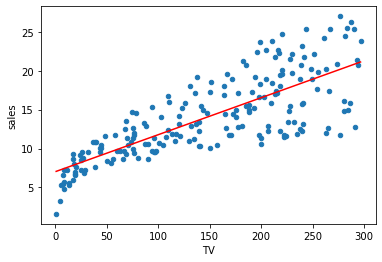

In [17]:
#first plot  observed data
data.plot('TV','sales',kind='scatter')

#second plot least square line
plt.plot(x_new,preds,c='red')

## model confidence

In [18]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='sales~TV',data=data).fit()
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


## hypothesis testing and p-values



In [19]:
#p-values
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. 

Thus, a p-value of less than 0.05 is a way to decide whether there is any relationship between the feature in consideration and the response or not. Using 0.05 as the cutoff is just a convention.

In this case, the p-value for TV ads is way less than 0.05, and so we **believe** that there is a relationship between TV advertisements and Sales.

Note that we generally ignore the p-value for the intercept.


## how well the model fit?

One of the most generic way to evaluate the fit of a linear model is by computing the **R-squared** value. R-squared explains the**proportion of variance**, i.e., the proportion of variance in the observed data which the model explains, or the reduction in error over the **null model**. (A null model only predicts the mean of all the observed responses, and thus it only has an intercept and no slope.)

The value of R-squared lies between 0 and 1. A value closer to 1 is better as it means that more variance is explained by the model. 


In [20]:
# r-square and adjusted r-square
print(lm.rsquared)
print(lm.rsquared_adj)

0.611875050850071
0.6099148238341623


## Multiple Regression

In [21]:
#create X and y
feature_col=['TV','radio','newspaper']
X=data[feature_col]
y=data['sales']

#follow the usual sklearn pattern:import  instantiate,fit
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X,y)

#print intercept and cofficents
print(lr_model.intercept_)
print(lr_model.coef_)


2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


- the coeffcient of newspaper is negative that means money spents on newspaper advertisement is  not contributing in positive way to sales

In [22]:
lm=smf.ols(formula='sales~TV+radio+newspaper',data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 07 Jan 2021   Prob (F-statistic):           1.58e-96
Time:                        16:16:20   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- ** conclusion from the summary**
- p-values of radio and TV is positive ,that means reject the hypothesis H0:No relation beetween TV and radio and sales
- p-value of newspaper fails to reject H0:no relation between newspaper spends sales.
- expense on newspaper is slightly negatively assosiate with sales
- this model has **R-square** :0.897,model explains variance more and provides batter fit to data than model that only inculde TV.


In [23]:
lm=smf.ols(formula='sales~TV+radio',data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 07 Jan 2021   Prob (F-statistic):           4.83e-98
Time:                        16:16:21   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
lm=smf.ols(formula='sales~TV+newspaper',data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Thu, 07 Jan 2021   Prob (F-statistic):           3.95e-45
Time:                        16:16:21   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## featrue Selection

- R-square
- adj R-square
- p-values
- cross-validation and resampling

### Handling Categorical Predictors with Two Categories

In [25]:
import numpy as np


In [26]:
nums=np.random.rand(len(data))
mark_large=nums>0.5

data['scale']='small'
data.loc[mark_large,'scale']='large'

In [27]:
data

,Unnamed: 0,TV,radio,newspaper,sales,scale
0,1,230.1,37.8,69.2,22.1,small
1,2,44.5,39.3,45.1,10.4,small
2,3,17.2,45.9,69.3,9.3,large
3,4,151.5,41.3,58.5,18.5,large
4,5,180.8,10.8,58.4,12.9,small
...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,small
196,197,94.2,4.9,8.1,9.7,large
197,198,177.0,9.3,6.4,12.8,small
198,199,283.6,42.0,66.2,25.5,small


In [28]:
data['issmall']=data.scale.map({'large':0,'small':1})

In [29]:
nums=np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Targeted Geography'] = 'rural'
data.loc[mask_suburban, 'Targeted Geography'] = 'suburban'
data.loc[mask_urban, 'Targeted Geography'] = 'urban'
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,scale,issmall,Targeted Geography
0,1,230.1,37.8,69.2,22.1,small,1,rural
1,2,44.5,39.3,45.1,10.4,small,1,urban
2,3,17.2,45.9,69.3,9.3,large,0,urban
3,4,151.5,41.3,58.5,18.5,large,0,suburban
4,5,180.8,10.8,58.4,12.9,small,1,suburban


In [ ]:
area_dummies=pd.get_dummies(data['Targeted Geography'],drop_first=True,prefix='Targeted Geography')
data=pd.concat([data,area_dummies],axis=1)

#### issue with dummy variables
- multicolinearity
- dummy trap


In [31]:
data

,Unnamed: 0,TV,radio,newspaper,sales,scale,issmall,Targeted Geography,Targeted Geography_suburban,Targeted Geography_urban
0,1,230.1,37.8,69.2,22.1,small,1,rural,0,0
1,2,44.5,39.3,45.1,10.4,small,1,urban,0,1
2,3,17.2,45.9,69.3,9.3,large,0,urban,0,1
3,4,151.5,41.3,58.5,18.5,large,0,suburban,1,0
4,5,180.8,10.8,58.4,12.9,small,1,suburban,1,0
...,...,...,...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,small,1,suburban,1,0
196,197,94.2,4.9,8.1,9.7,large,0,rural,0,0
197,198,177.0,9.3,6.4,12.8,small,1,urban,0,1
198,199,283.6,42.0,66.2,25.5,small,1,suburban,1,0


In [39]:
col_feature=['TV','radio','newspaper','issmall']
X=data[col_feature]
y=data.sales

lr_model=LinearRegression()
lr_model.fit(X,y)

# print coefficients
i=0
for col in col_feature:
    print('The Coefficient of ',col, ' is: ',lr_model.coef_[i])
    i=i+1



The Coefficient of  TV  is:  0.04588362772950086
The Coefficient of  radio  is:  0.18905476433379553
The Coefficient of  newspaper  is:  -0.0019239861896373678
The Coefficient of  issmall  is:  -0.310323208708423


In [40]:
col_feature=['TV','radio','newspaper','issmall','Targeted Geography_suburban','Targeted Geography_urban']
X=data[col_feature]
y=data.sales

lr_model=LinearRegression()
lr_model.fit(X,y)

# print coefficients
i=0
for col in col_feature:
    print('The Coefficient of ',col, ' is: ',lr_model.coef_[i])
    i=i+1



The Coefficient of  TV  is:  0.0460130207530381
The Coefficient of  radio  is:  0.18905231299417996
The Coefficient of  newspaper  is:  -0.0021349962969461453
The Coefficient of  issmall  is:  -0.30725781871802743
The Coefficient of  Targeted Geography_suburban  is:  -0.10491067696342725
The Coefficient of  Targeted Geography_urban  is:  0.10828071824291906


How do we interpret the coefficients?
- If all other columns are constant, the _suburban_  geography is associated with an average **decrease** of 104.91 widgets in sales for $1000 spent. 

- if $1000 is spent in an _urban_ geography, it amounts to an average **increase** in Sales of 108.28 widgets


#### Why Should We Care About Multi-Collinearity?
* The coefficients in a Linear Regression model represent the extent of change in Y when a certain x (amongst X1,X2,X3…) is changed keeping others constant. But, if x1 and x2 are dependent, then this assumption itself is wrong that we are changing one variable keeping others constant as the dependent variable will also be changed. It means that our model itself becomes a bit flawed.
* We have a redundancy in our model as two variables (or more than two) are trying to convey the same information.
* As the extent of the collinearity increases, there is a chance that we might produce an overfitted model. An overfitted model works well with the test data but its accuracy fluctuates when exposed to other data sets. 
* Can result in a Dummy Variable Trap.

##### Detection
* __Correlation Matrices and Plots:__ for correlation between all the X variables.
        
        This plot shows the extent of correlation between the independent variable. Generally, a correlation greater than 0.9 or less than -0.9 is to be avoided.
    <img src="cor.PNG" width="500">
* __Variance Inflation Factor:__ Regression of one X variable against other X variables.

     VIF=$\frac {1}{(1-R squared)}$

            The VIF factor, if greater than 10 shows extreme correlation between the variables and then we need to take care of the correlation.

## checking to overfitting of model

## Regularization

- regularization makes sure model not be overfitted by restricting degree of freedom  of given equation.
- add the shrinkage penalty to the cost function



##  Lasso Regression(from L1)
- penalize the model based on sum of magnitude all coefficent 
- regularization=$ \lambda *\sum  |\beta_j| $
- Where, λ is the shrinkage factor.

## Ridge Regression(from L2)
- penalize the model based on sum of magnitude of all coefficient
 regularization=$ \lambda *\sum  |\beta_j ^ 2| $

Where, λ is the shrinkage factor.


## Elastic net
- elastic net is the middle ground of Lasso and Ridge 
- regularization term is the mixer of both

In [138]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LassoCV,Ridge,ElasticNetCV,ElasticNet

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

sb.set()


In [105]:
# creating adj-R square
def adj_r2(X,y):
    r2=regression.score(X,y)
    n=data.shape[0]
    p=data.shape[1]
    adj_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2

    

In [45]:
data=pd.read_csv('Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [46]:
data.shape

(500, 9)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [49]:
data.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [50]:
data.drop('Serial No.',axis=1,inplace=True)

In [51]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [53]:
data.isnull().sum()

GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [62]:
data['GRE Score']=data['GRE Score'].fillna(np.mean(data['GRE Score']))
data['TOEFL Score']=data['TOEFL Score'].fillna(np.mean(data['TOEFL Score']))
data['University Rating']=data['University Rating'].fillna(data['University Rating'].mode()[0])

C:\Users\Krishna Desai\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Krishna Desai\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Krishna Desai\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

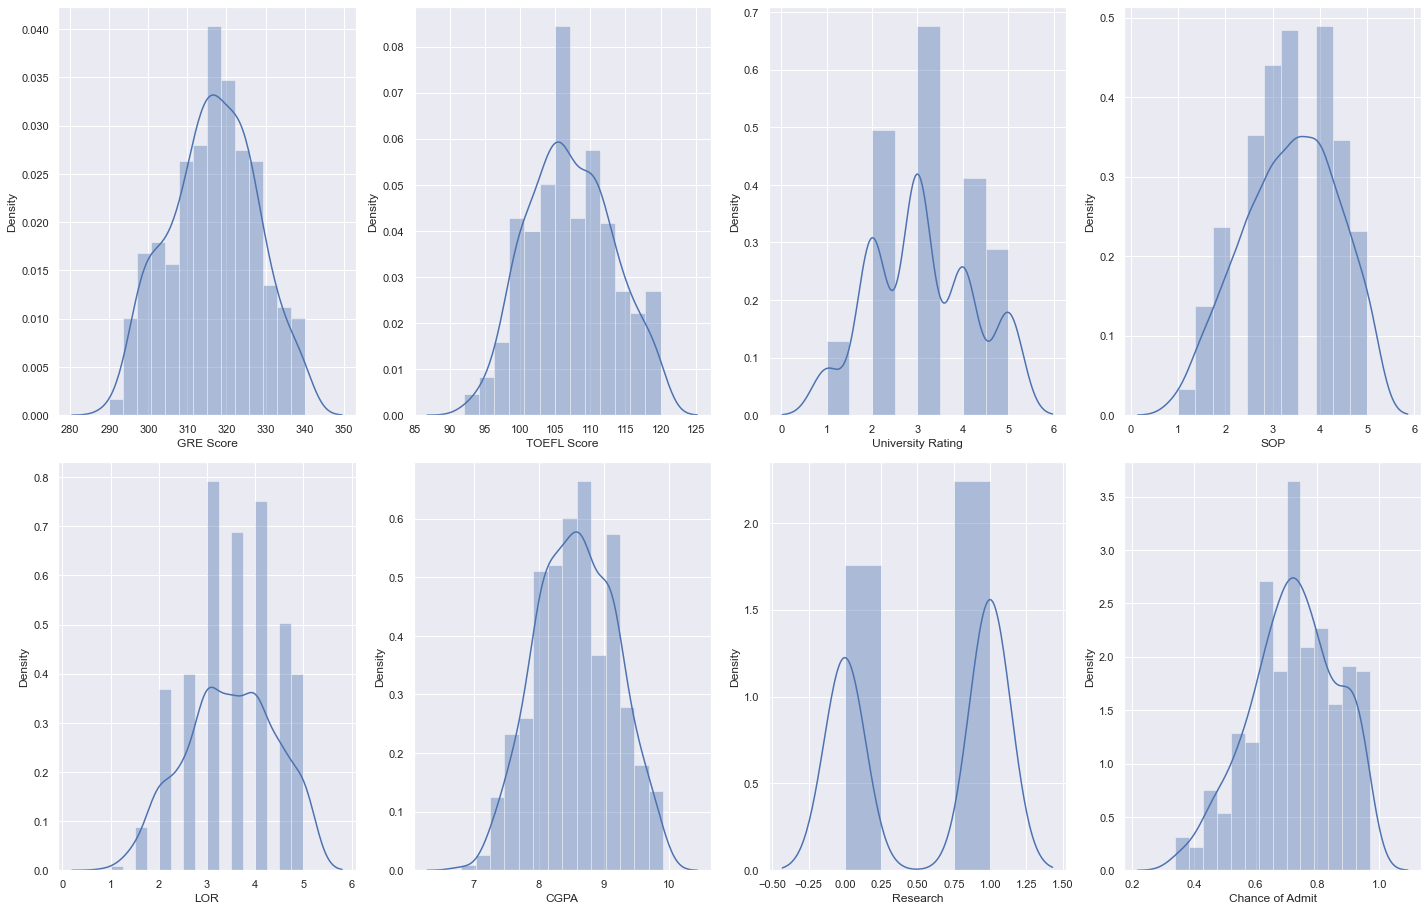

In [71]:
plt.figure(figsize=(20,25), facecolor='white')
x = 1

for col in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,x)
        sb.distplot(data[col])
        plt.xlabel(col)
        #plt.ylabel('Salary',fontsize=20)
    x+=1
plt.tight_layout()
    

- no skewness in data

In [73]:
y=data['Chance of Admit']
X=data.drop('Chance of Admit',axis=1)


C:\Users\Krishna Desai\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Krishna Desai\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Krishna Desai\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

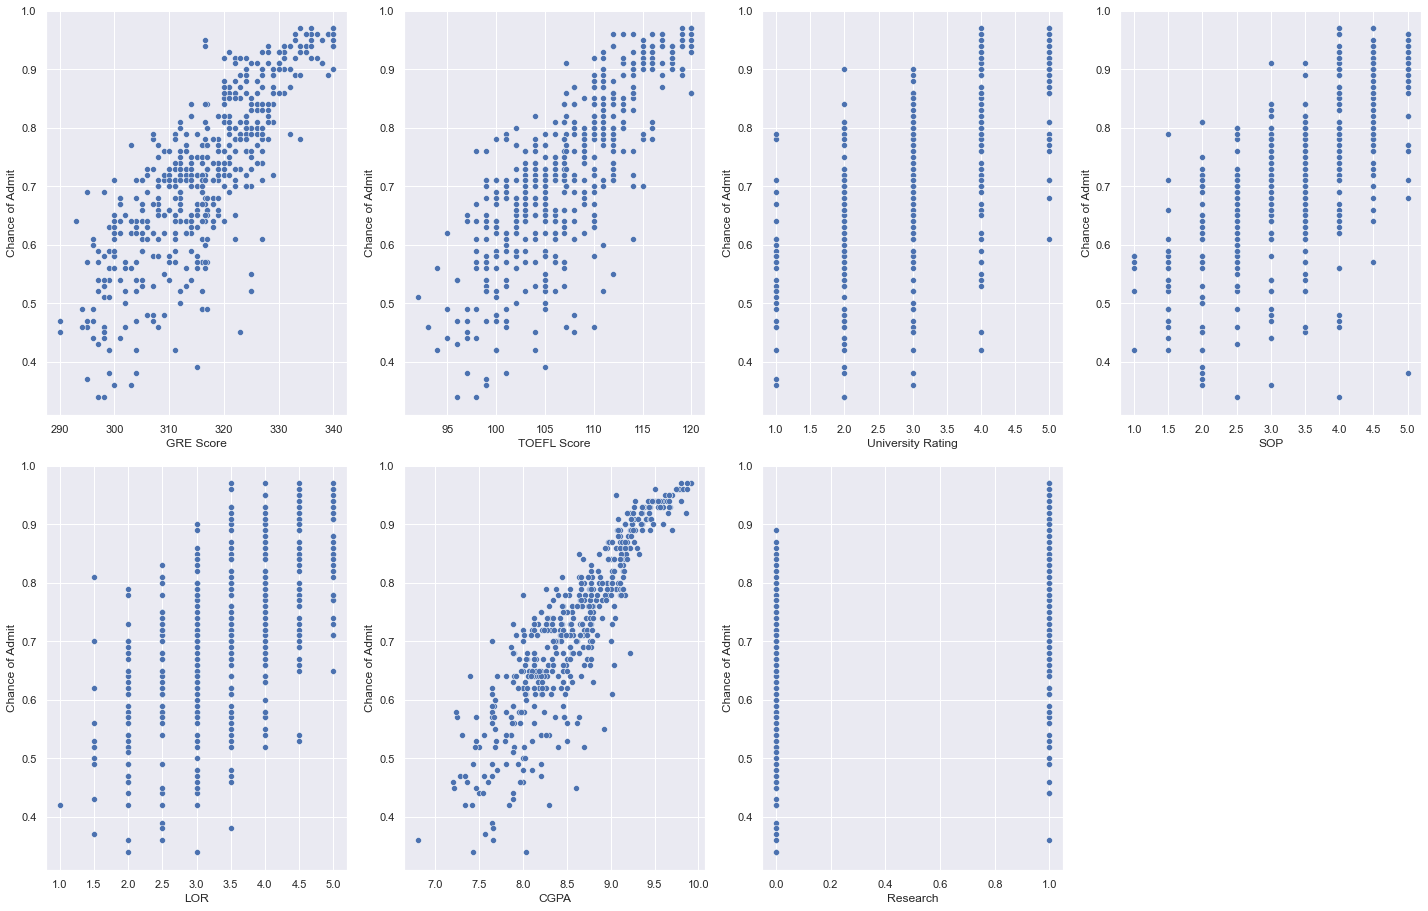

In [77]:
plt.figure(figsize=(20,25), facecolor='white')
x = 1

for col in X:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,x)
        sb.scatterplot(X[col],y)
        plt.xlabel(col)
        #plt.ylabel('Salary',fontsize=20)
    x+=1
plt.tight_layout()

Great, the relationship between the dependent and independent variables look fairly linear.
Thus, our linearity assumption is satisfied.

### Let's move ahead and check for multicollinearity.

In [81]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.819663,0.623394,0.608372,0.527623,0.818347,0.544993,0.802304
TOEFL Score,0.819663,1.000000,0.644296,0.643155,0.535785,0.805557,0.464913,0.786675
University Rating,0.623394,0.644296,1.000000,0.713657,0.606949,0.697704,0.424966,0.681482
SOP,0.608372,0.643155,0.713657,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.527623,0.535785,0.606949,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.818347,0.805557,0.697704,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.544993,0.464913,0.424966,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.802304,0.786675,0.681482,0.684137,0.645365,0.882413,0.545871,1.000000


In [82]:
scaler=StandardScaler()

In [83]:
x_scaled=scaler.fit_transform(X)


In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Feature']=X.columns
vif

,VIF,Feature
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


In [91]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state=355)

In [92]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [97]:
#saving model in local file system
filename='final_model.pickle'
pickle.dump(regression,open(filename,'wb'))

In [102]:
#prediction using saved model
load_model=pickle.load(open(filename,'rb'))
a=load_model.predict(scaler.fit_transform([[300,110,5,5,5,10,1]]))
a

array([0.72320457])

In [103]:
regression.score(x_train,y_train)

0.8415250484247909

In [106]:
adj_r2(x_train,y_train)

0.8389429718207142

Our r2 score is 84.15% and adj r2 is 83.85% for our training et., so looks like we are not being penalized by use of any feature.

Let's check how well model fits the test data.

Now let's check if our model is overfitting our data using regularization.

In [108]:
regression.score(x_test,y_test)


0.7534898831471067

In [109]:
adj_r2(x_test,y_test)

0.7494734250313773

In [125]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =5, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=5, max_iter=100000, normalize=True)

In [126]:
alpha=lasscv.alpha_

In [127]:
lasso_reg=LassoCV(alpha)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_test,y_test)

C:\Users\Krishna Desai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass eps=5.302290459369658e-05 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


0.7527926388277932

our r2_score for test data (75.34%) comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data.

In [128]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([4.00499374, 4.92099335, 8.84583605, 2.40759469, 6.68333268,
       7.33123286, 1.50474558, 5.30917273, 7.30792544, 2.50421645,
       7.5724004 , 1.28291011, 8.54244721, 7.43594136, 8.93493216,
       7.86023836, 7.29214398, 1.8258684 , 8.47997627, 4.09375945,
       8.74265649, 3.69799687, 3.42606307, 8.76068515, 0.562983  ,
       4.18624807, 9.9190282 , 2.49840902, 2.95131915, 1.98313135,
       0.33586876, 3.83502828, 7.42500788, 3.05039494, 5.01215417,
       5.82374845, 8.6620248 , 4.02593773, 0.26811177, 4.11694979,
       9.79501737, 6.73157312, 2.20079152, 0.4877462 , 8.63466494,
       1.96469341, 4.1623093 , 3.31353571, 6.88100878, 0.29319325]),
        cv=10, normalize=True)

In [129]:
ridgecv.alpha_

0.2681117690871426

In [132]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.2681117690871426)

In [133]:
ridge_model.score(x_test,y_test)

0.753620558392176

In [134]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [135]:
elasticCV.alpha_

0.0011069728449315508

In [136]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [139]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.0011069728449315508)

In [140]:
elasticnet_reg.score(x_test, y_test)

0.7531695370639867

So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.

## polynomial regression

In [141]:
#importing the dataset
dataset= pd.read_csv('Position_Salaries.csv') # the full namespace of the file can be provided if the file is not in the same directory as the .ipynb or.py file
dataset.head()   # to see how the imported data looks like

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [150]:
X=dataset.iloc[:,1:2].values
y=dataset.Salary.values

X
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [151]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

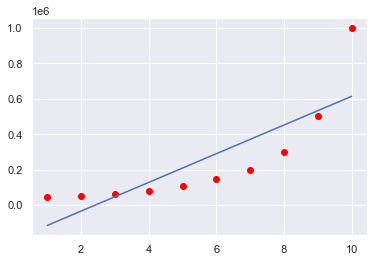

In [155]:
plt.scatter(X,y,c='red')
plt.plot(X,lin_reg.predict(X))
plt.show()

In [165]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(X)


In [166]:
lin_reg.fit(x_poly,y)


LinearRegression()

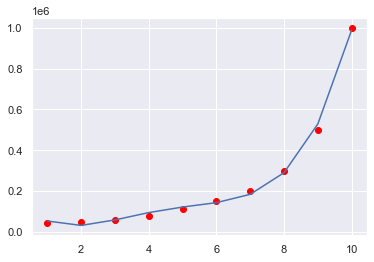

In [167]:
plt.scatter(X,y,c='red')
plt.plot(X,lin_reg.predict(poly_reg.fit_transform(X)))
plt.show()